Dataset used: https://www.kaggle.com/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
pip install ultralytics

In [10]:
from ultralytics import YOLO

In [11]:
yaml_content = """
# Train images
train: /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/train/images

# Validation images
val: /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/valid/images

# Test images
test: /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test/images

# No. of classes
nc: 3

# Class names
names: ['glioma', 'meningioma', 'pituitary']
"""

with open("data.yaml", "w") as f:
    f.write(yaml_content)

## Model Training

![Screenshot 2025-06-13 at 10.05.47.jpg](../img/Screenshot%202025-06-13%20at%2010.05.47.jpg) ![Screenshot 2025-06-13 at 10.06.49.jpg](../img/Screenshot%202025-06-13%20at%2010.06.49.jpg)

In [6]:
def train_model():
    model = YOLO('yolov8m.pt')         # We can also try yolov8n.pt, yolov8s.pt, yolov8l.pt, etc.

    model.train(
        
        data='data.yaml',
        epochs = 50,                   # initially trained model with epoch = 1 
        imgsz = 640,                   # image size
        batch = 16,                    # default batch size for full training 
        # fraction = 0.05,              # Initially trained on 5% of dataset for training
        project='/kaggle/working/runs/full_training',
        name='custom_exp',             # This will create: /kaggle/working/runs/train/custom_exp/
    )

if __name__ == "__main__":
    train_model()

100%|██████████| 49.7M/49.7M [00:00<00:00, 227MB/s]


Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=custom_exp, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile

100%|██████████| 755k/755k [00:00<00:00, 17.5MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 53.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.2±0.5 ms, read: 3.9±1.1 MB/s, size: 31.9 KB)


train: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/train/labels... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:12<00:00, 166.97it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.0±0.6 ms, read: 4.6±0.4 MB/s, size: 34.0 KB)


val: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/valid/labels... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:03<00:00, 167.99it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/runs/full_training/custom_exp/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/runs/full_training/custom_exp
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.11G      1.331      2.791      1.494         31        640: 100%|██████████| 134/134 [01:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


                   all        612        612      0.447      0.219      0.154      0.079

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.31G      1.448      2.011      1.585         24        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]


                   all        612        612      0.205      0.498      0.219      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.38G      1.436      1.917      1.576         20        640: 100%|██████████| 134/134 [01:08<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.38it/s]

                   all        612        612      0.203      0.301      0.198       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.28G       1.41      1.824      1.568         30        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.592      0.546      0.593      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.34G      1.328       1.64      1.503         25        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.40it/s]

                   all        612        612      0.586      0.481      0.506      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.89G      1.346      1.608      1.525         20        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.586      0.475      0.507      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.96G      1.319      1.552      1.498         35        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.40it/s]

                   all        612        612      0.579      0.505      0.533      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.03G      1.252      1.461       1.45         29        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.40it/s]

                   all        612        612      0.758       0.59      0.675      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.49G      1.254      1.446      1.459         23        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.40it/s]

                   all        612        612      0.735      0.707      0.755      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       7.3G      1.192      1.327      1.417         17        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.728      0.616      0.699      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.33G      1.213      1.332      1.441         30        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.702      0.693       0.72      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.39G      1.192      1.287       1.42         28        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]

                   all        612        612      0.754      0.703       0.77      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.28G       1.15       1.23      1.372         28        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]

                   all        612        612      0.749      0.755      0.795      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.83G      1.148      1.192       1.38         19        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.817       0.73      0.804      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       6.9G      1.123      1.164      1.373         26        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]

                   all        612        612      0.751      0.746      0.797      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.96G      1.105      1.125      1.355         18        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.40it/s]

                   all        612        612      0.702      0.684      0.704      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.03G      1.095      1.093      1.347         20        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.716      0.697        0.7      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       7.1G      1.101      1.115      1.351         24        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612       0.79      0.798      0.835      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.16G       1.06      1.036      1.327         24        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.796      0.757      0.821       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.23G      1.063      1.039      1.332         30        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.39it/s]

                   all        612        612      0.806      0.763      0.829      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       7.3G      1.055      1.001      1.326         28        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]

                   all        612        612       0.82      0.807      0.851      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.37G      1.046     0.9937      1.313         29        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.804      0.773      0.843      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.56G      1.023     0.9527      1.294         20        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.799      0.795      0.848      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.37G      1.017     0.9448      1.294         20        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.828      0.785      0.847      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.37G      1.001      0.926      1.288         29        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.861       0.77      0.868      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       7.4G      1.005     0.8924      1.288         26        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]

                   all        612        612      0.859      0.782       0.86      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.29G     0.9772      0.916      1.278         15        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.39it/s]

                   all        612        612      0.824      0.781      0.852      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.35G     0.9585     0.8505      1.243         23        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]

                   all        612        612      0.854      0.831      0.887      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.91G     0.9453     0.8256      1.229         21        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.871      0.795      0.869      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.97G       0.97     0.8654      1.277         27        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]

                   all        612        612      0.873      0.811      0.859      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.04G     0.9463     0.8224      1.241         28        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]

                   all        612        612       0.86      0.826      0.884      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.11G     0.9159     0.7976      1.224         28        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.836      0.839      0.885      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.17G     0.9178     0.7879      1.233         21        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.866      0.838      0.883      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.24G     0.9083     0.7538      1.221         32        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.39it/s]

                   all        612        612      0.882      0.844      0.899      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.31G     0.8991     0.7245      1.203         35        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        612        612      0.856      0.827      0.885      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.38G     0.8962     0.7144      1.214         25        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]

                   all        612        612      0.862      0.847      0.883      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       6.4G     0.8769      0.704      1.202         20        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.44it/s]

                   all        612        612      0.856      0.841      0.887      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       6.4G     0.8741      0.705       1.19         31        640: 100%|██████████| 134/134 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.43it/s]

                   all        612        612      0.901      0.852      0.903      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       6.9G     0.8671     0.6908      1.188         31        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.43it/s]

                   all        612        612      0.863      0.873      0.909      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.96G     0.8316     0.6371      1.173         24        640: 100%|██████████| 134/134 [01:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.45it/s]

                   all        612        612        0.9      0.862        0.9      0.677


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.03G     0.7721     0.5933      1.157         16        640: 100%|██████████| 134/134 [01:08<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.43it/s]

                   all        612        612      0.892      0.844      0.903      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       7.1G     0.7328     0.5079      1.124         16        640: 100%|██████████| 134/134 [01:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.43it/s]

                   all        612        612      0.901       0.85      0.906      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.17G      0.727     0.4817      1.121         16        640: 100%|██████████| 134/134 [01:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]

                   all        612        612      0.904      0.858      0.914      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.23G     0.7021      0.455      1.095         16        640: 100%|██████████| 134/134 [01:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.45it/s]

                   all        612        612        0.9       0.86      0.915       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       7.3G     0.6894     0.4505      1.089         16        640: 100%|██████████| 134/134 [01:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.45it/s]

                   all        612        612       0.89       0.86      0.906      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.37G     0.6832      0.435      1.094         16        640: 100%|██████████| 134/134 [01:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.45it/s]

                   all        612        612      0.878      0.867      0.904      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.37G     0.6587     0.4077      1.075         16        640: 100%|██████████| 134/134 [01:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.45it/s]

                   all        612        612      0.893      0.877      0.909      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.37G     0.6509     0.4087      1.065         16        640: 100%|██████████| 134/134 [01:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.46it/s]

                   all        612        612      0.894      0.862      0.909      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.85G     0.6343     0.3872       1.05         16        640: 100%|██████████| 134/134 [01:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.44it/s]

                   all        612        612      0.881      0.875       0.91      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.86G     0.6311      0.384      1.048         16        640: 100%|██████████| 134/134 [01:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.44it/s]

                   all        612        612      0.908      0.865      0.914      0.692



50 epochs completed in 1.073 hours.
Optimizer stripped from /kaggle/working/runs/full_training/custom_exp/weights/last.pt, 52.0MB
Optimizer stripped from /kaggle/working/runs/full_training/custom_exp/weights/best.pt, 52.0MB

Validating /kaggle/working/runs/full_training/custom_exp/weights/best.pt...
Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        612        612      0.908      0.865      0.914      0.692
                glioma        285        285      0.826       0.74      0.812      0.524
            meningioma        142        142      0.956      0.918      0.973      0.816
             pituitary        185        185      0.941      0.935      0.955      0.735
Speed: 0.2ms preprocess, 10.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /kaggle/working/runs/full_training/custom_exp


## Plotting Precision, Recall & mAP

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
results_path = '/kaggle/working/runs/full_training/custom_exp/results.csv'
df = pd.read_csv(results_path)

# Printing column names to see the exact format
print(df.columns.tolist())

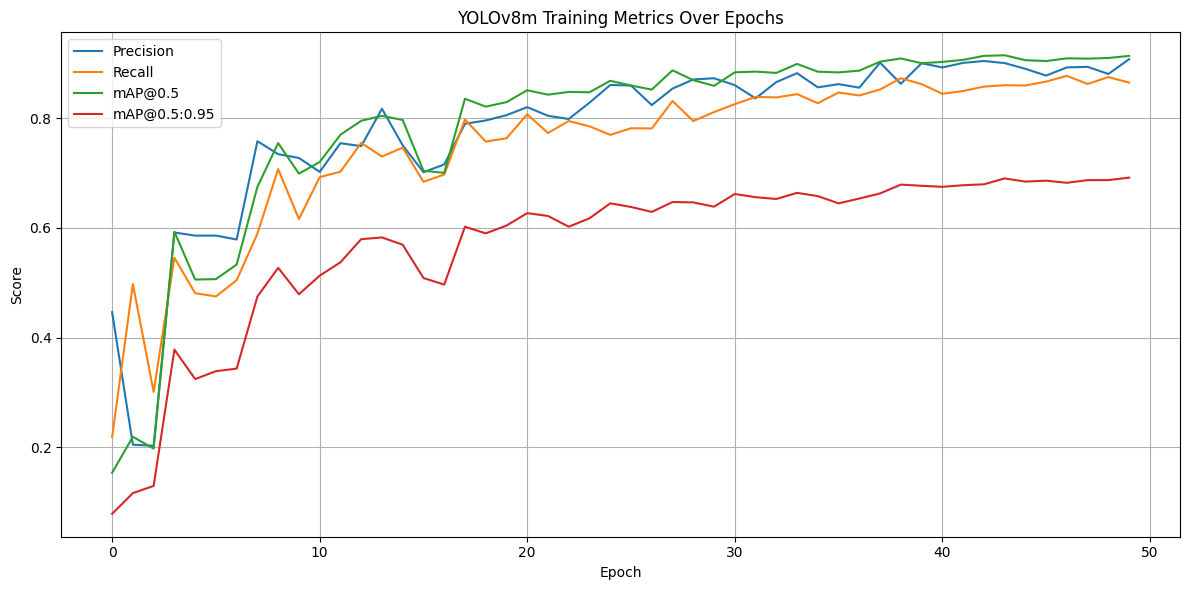

In [10]:
results_path = '/kaggle/working/runs/full_training/custom_exp/results.csv'
df = pd.read_csv(results_path)

# Plot key training metrics
plt.figure(figsize=(12, 6))
plt.plot(df['metrics/precision(B)'], label='Precision')
plt.plot(df['metrics/recall(B)'], label='Recall')
plt.plot(df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('YOLOv8m Training Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

## Splitting each metric into its own subplot

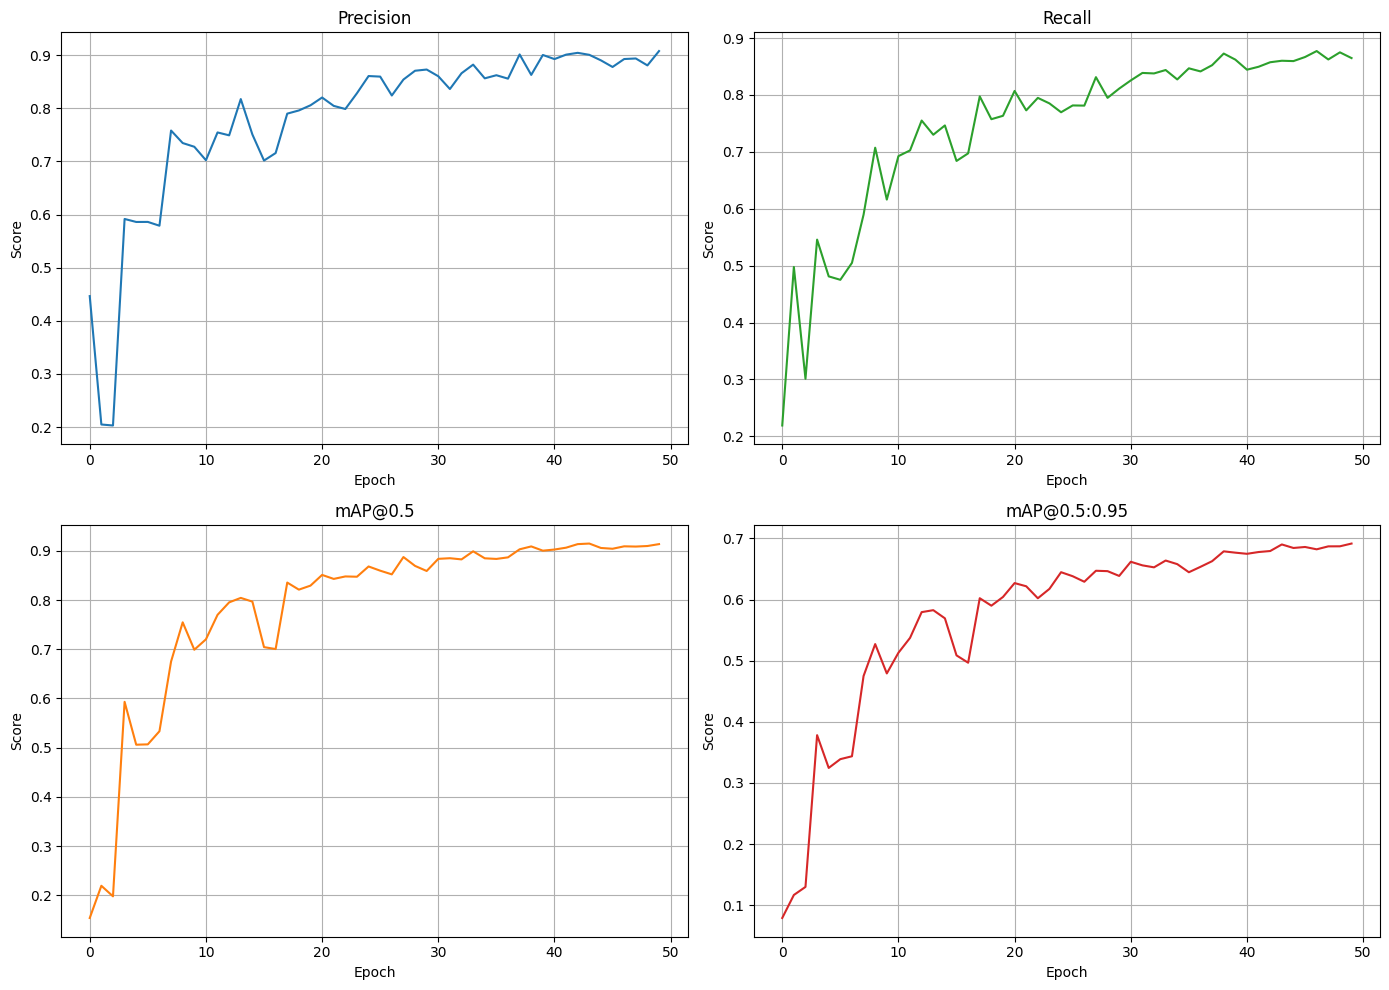

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Actual column names
metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
titles = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']  # You can customize these

# Plotting each metric with a different color
for ax, metric, title, color in zip(axes.flat, metrics, titles, colors):
    ax.plot(df[metric], color=color)
    ax.set_title(title)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Score')
    ax.grid(True)

plt.tight_layout()
plt.show()

## Confusion Matrix

Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.6 ms, read: 26.4±2.9 MB/s, size: 32.4 KB)


val: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/valid/labels... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:01<00:00, 523.83it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:15<00:00,  2.45it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        612        612      0.908      0.865      0.914      0.693
                glioma        285        285      0.826       0.74      0.812      0.525
            meningioma        142        142      0.956      0.919      0.973      0.818
             pituitary        185        185      0.942      0.935      0.955      0.736
Speed: 0.7ms preprocess, 21.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val2


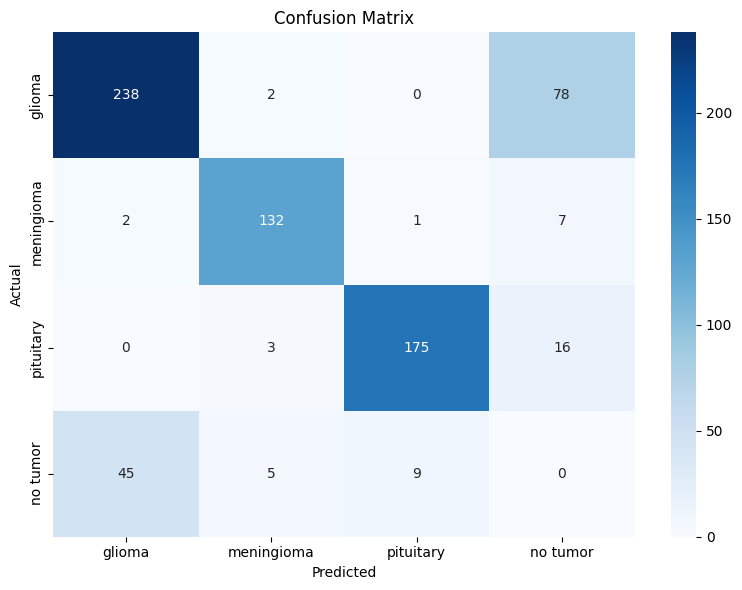

In [15]:
from ultralytics import YOLO
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load trained model
model = YOLO('/kaggle/working/runs/full_training/custom_exp/weights/best.pt')

# Run validation
results = model.val()

# Ensure confusion matrix exists
if hasattr(results, 'confusion_matrix') and results.confusion_matrix is not None:
    cm = results.confusion_matrix.matrix

    # YOLO might include background class (no tumor) as 4th class
    class_names = ['glioma', 'meningioma', 'pituitary', 'no tumor']

    # Ensure it's a numpy array of integers
    cm = np.array(cm).astype(int)

    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()
else:
    print("Confusion matrix not available. Make sure the model has been validated correctly.")

## Detection

In [ ]:
import os
from ultralytics import YOLO

In [ ]:
from ultralytics import YOLO
import os

def detect_folder(
    test_folder = '/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test/images',
    model_weights = '/kaggle/input/my-uploaded-model/best.pt',
    confidence_threshold = 0.5):

    # Load the model
    model = YOLO(model_weights)

    # Run prediction on all images in the folder
    model.predict(
        source = test_folder,
        show = False,                           # Show might not work in Kaggle
        save = True,                            # Save annotated images
        conf = confidence_threshold,
        line_width = 2,
        project = 'results',                    # Folder to save results
        name = 'yolo_batch_detection'           # Subfolder name
    )

    print(f"Detection completed. Annotated images saved to ../results/yolo_batch_detection/")

if __name__ == "__main__":
    detect_folder()


image 1/308 /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test/images/1003_jpg.rf.028d6d76fba92dd9e5dc59dc9d0f7293.jpg: 640x640 1 pituitary, 36.9ms
image 2/308 /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test/images/1012_jpg.rf.a9d8d27f5e1d382e0b93ff4a479f4519.jpg: 640x640 1 pituitary, 35.5ms
image 3/308 /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test/images/1018_jpg.rf.29ed2fb6754ca58ae27204ef24344650.jpg: 640x640 1 pituitary, 35.3ms
image 4/308 /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test/images/102_jpg.rf.e58e0fc30dfea3a7a410d7b901223f16.jpg: 640x640 1 meningioma, 35.3ms
image 5/308 /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test/images/1033_jpg.rf.1b4c0f5bdf30ec0ba218874a3a737720.jpg: 640x640 1 pituitary, 35.3ms
image 6/308 /kaggle/input/medical-image-dataset-brain-tumor

In [8]:
!zip -r /kaggle/working/detected_images.zip /kaggle/working/results/yolo_batch_detection
from IPython.display import FileLink
FileLink('/kaggle/working/detected_images.zip')

  adding: kaggle/working/results/yolo_batch_detection/ (stored 0%)
  adding: kaggle/working/results/yolo_batch_detection/615_jpg.rf.f2af9f7efd4c14deab8b647bccd6dfe5.jpg (deflated 4%)
  adding: kaggle/working/results/yolo_batch_detection/1033_jpg.rf.1b4c0f5bdf30ec0ba218874a3a737720.jpg (deflated 4%)
  adding: kaggle/working/results/yolo_batch_detection/2644_jpg.rf.a0fc4011f23db39f54925c2a1a997bfb.jpg (deflated 5%)
  adding: kaggle/working/results/yolo_batch_detection/1951_jpg.rf.eb08d051c58cf70408f3def1b2f274de.jpg (deflated 5%)
  adding: kaggle/working/results/yolo_batch_detection/2548_jpg.rf.ac53adca8ccdd9528c674565e3fc089f.jpg (deflated 6%)
  adding: kaggle/working/results/yolo_batch_detection/2242_jpg.rf.2a39144f4a2f0c1e6b3af1631549f60d.jpg (deflated 5%)
  adding: kaggle/working/results/yolo_batch_detection/1999_jpg.rf.2b6f52703a64ead20b91dea96eef0178.jpg (deflated 6%)
  adding: kaggle/working/results/yolo_batch_detection/1710_jpg.rf.36fe9d822cf5079600022f12aa2d0f3a.jpg (deflated 4%

/kaggle/working/detected_images.zip